In [1]:
import pandas as pd
JPE = pd.read_excel('/Users/MattJohnson/Library/CloudStorage/OneDrive-UniversityofCapeTown/Masters_thesis/Data checks/Consolidation/Finalized/JPE_affiliations.xlsx')
print(JPE.shape)


(3823, 38)


In [2]:
JPE = JPE[['Journal_Name' ,'Authors_count', 'Authors_list', 'Article_ID', 'year',
 
 '0_author_affs_consolidated_0',
 '0_author_affs_consolidated_1', 
 '0_author_affs_consolidated_2', 

 '1_author_affs_consolidated_0',
 '1_author_affs_consolidated_1',
 '1_author_affs_consolidated_2',

 '2_author_affs_consolidated_0',
 '2_author_affs_consolidated_1', 
 '2_author_affs_consolidated_2' ,

 '3_author_affs_consolidated_0',
 '3_author_affs_consolidated_1',

 '4_author_affs_consolidated_0',

 '5_author_affs_consolidated']]

In [3]:
melted = JPE.melt(id_vars= ['Article_ID','year'], value_vars=['0_author_affs_consolidated_0','0_author_affs_consolidated_1','0_author_affs_consolidated_2',
                                                              '1_author_affs_consolidated_0','1_author_affs_consolidated_1','1_author_affs_consolidated_2',
                                                              '2_author_affs_consolidated_0','2_author_affs_consolidated_1','2_author_affs_consolidated_2',
                                                              '3_author_affs_consolidated_0','3_author_affs_consolidated_1',
                                                              '4_author_affs_consolidated_0','5_author_affs_consolidated']).dropna()

melted.rename(columns = {'variable':'Aff number'}, inplace = True)
melted.rename(columns = {'value':'Affiliation'}, inplace = True)

melted = melted.sort_values(by=['year'])

print(melted.head())
print(melted.shape)

    Article_ID  year                    Aff number              Affiliation
0      1825913  1940  0_author_affs_consolidated_0     Washington DC (City)
23     1825908  1940  0_author_affs_consolidated_0    University Of Chicago
24     1824384  1940  0_author_affs_consolidated_0      Columbia University
25     1824382  1940  0_author_affs_consolidated_0       Cornell University
26     1824381  1940  0_author_affs_consolidated_0  University Of Edinburgh
(6426, 4)


In [4]:
melted['aff_cum_counts'] = melted.groupby(['Affiliation']).cumcount()+1

melted = melted[['Article_ID' ,'Aff number', 'Affiliation','year', 'aff_cum_counts']]
melted.head()

,Article_ID,Aff number,Affiliation,year,aff_cum_counts
0,1825913,0_author_affs_consolidated_0,Washington DC (City),1940,1
23,1825908,0_author_affs_consolidated_0,University Of Chicago,1940,1
24,1824384,0_author_affs_consolidated_0,Columbia University,1940,1
25,1824382,0_author_affs_consolidated_0,Cornell University,1940,1
26,1824381,0_author_affs_consolidated_0,University Of Edinburgh,1940,1


In [5]:
# Checking the top 20 occurances of Universities over the 70 years
highest_vals = melted.drop_duplicates(subset = ['Affiliation'], keep = 'last')
highest_vals_10 = highest_vals.nlargest(20,'aff_cum_counts')
highest_vals_10

,Article_ID,Aff number,Affiliation,year,aff_cum_counts
3814,652462,0_author_affs_consolidated_0,University Of Chicago,2010,491
19097,655858,1_author_affs_consolidated_1,National Bureau Of Economic Research,2010,413
15288,653714,1_author_affs_consolidated_0,Harvard University,2010,202
3819,653714,0_author_affs_consolidated_0,Massachusetts Institute Of Technology,2010,196
15272,655844,1_author_affs_consolidated_0,University Of Pennsylvania,2010,152
3809,651673,0_author_affs_consolidated_0,Stanford University,2010,141
3820,653138,0_author_affs_consolidated_0,Princeton University,2010,141
3822,652463,0_author_affs_consolidated_0,Columbia University,2010,132
3800,657949,0_author_affs_consolidated_0,Yale University,2010,115
15267,658161,1_author_affs_consolidated_0,Northwestern University,2010,114


(71, 5)
     Article_ID                    Aff number            Affiliation  year  \
13      1824211  0_author_affs_consolidated_0  University Of Chicago  1940   
49      1825328  0_author_affs_consolidated_0  University Of Chicago  1941   
90      1825229  0_author_affs_consolidated_0  University Of Chicago  1942   
132     1826593  0_author_affs_consolidated_0  University Of Chicago  1943   
156     1826964  0_author_affs_consolidated_0  University Of Chicago  1944   

     aff_cum_counts  
13                3  
49               10  
90               13  
132              16  
156              20  
       Article_ID                    Aff number            Affiliation  year  \
3665       508031  0_author_affs_consolidated_0  University Of Chicago  2006   
15197      514347  1_author_affs_consolidated_0  University Of Chicago  2007   
3745       589756  0_author_affs_consolidated_0  University Of Chicago  2008   
15248      597301  1_author_affs_consolidated_0  University Of Chicago 

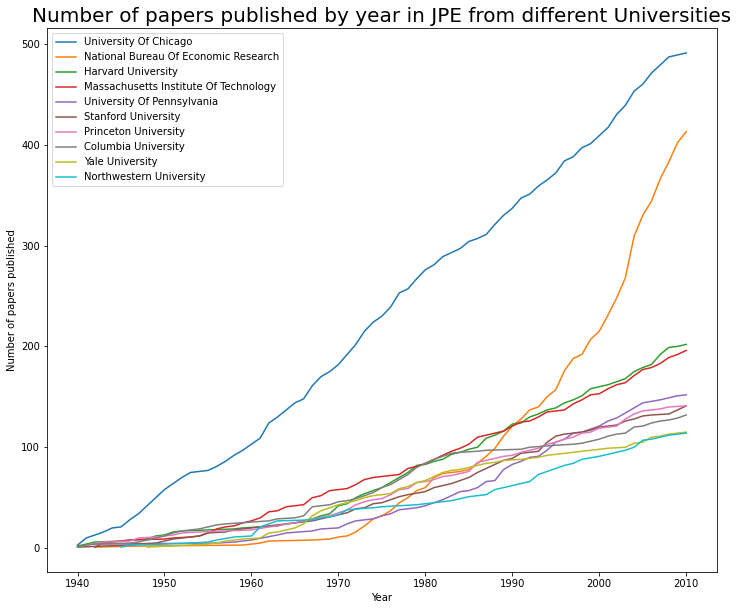

In [6]:
#Stacked plot on all years
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#print(melted.head())

a = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[0,2])].drop_duplicates(subset = ['year'], keep = 'last')
print(a.shape)
print(a.head())
print(a.tail())
b = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[1,2])].drop_duplicates(subset = ['year'], keep = 'last')
print(b.shape)
c = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[2,2])].drop_duplicates(subset = ['year'], keep = 'last')
d = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[3,2])].drop_duplicates(subset = ['year'], keep = 'last')
e = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[4,2])].drop_duplicates(subset = ['year'], keep = 'last')
f = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[5,2])].drop_duplicates(subset = ['year'], keep = 'last')
g = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[6,2])].drop_duplicates(subset = ['year'], keep = 'last')
h = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[7,2])].drop_duplicates(subset = ['year'], keep = 'last')
i = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[8,2])].drop_duplicates(subset = ['year'], keep = 'last')
j = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[9,2])].drop_duplicates(subset = ['year'], keep = 'last')
k = melted.loc[(melted['Affiliation'] == highest_vals_10.iat[10,2])].drop_duplicates(subset = ['year'], keep = 'last')

plt.figure(figsize=(12,10))
plt.plot(a['year'],a['aff_cum_counts'], label = highest_vals_10.iat[0,2])
plt.plot(b['year'],b['aff_cum_counts'], label = highest_vals_10.iat[1,2])
plt.plot(c['year'],c['aff_cum_counts'], label = highest_vals_10.iat[2,2])
plt.plot(d['year'],d['aff_cum_counts'], label = highest_vals_10.iat[3,2])
plt.plot(e['year'],e['aff_cum_counts'], label = highest_vals_10.iat[4,2])
plt.plot(f['year'],f['aff_cum_counts'], label = highest_vals_10.iat[5,2])
plt.plot(g['year'],g['aff_cum_counts'], label = highest_vals_10.iat[6,2])
plt.plot(h['year'],h['aff_cum_counts'], label = highest_vals_10.iat[7,2])
plt.plot(i['year'],i['aff_cum_counts'], label = highest_vals_10.iat[8,2])
plt.plot(j['year'],j['aff_cum_counts'], label = highest_vals_10.iat[9,2])
#plt.plot(k['year'],k['aff_cum_counts'], label = highest_vals_10.iat[10,2])

plt.title('Number of papers published by year in JPE from different Universities', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Number of papers published')

plt.legend()
plt.show()